In [25]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.python.keras.utils.np_utils import to_categorical
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [35]:
digits_train = pd.read_csv("data/train.csv")


#input data for awnsering opdracht
digits_test = pd.read_csv("data/test.csv")
test_data_in = digits_test.to_numpy()
test_data = np.reshape(test_data_in, (test_data_in.shape[0], 28, 28))
test_data = np.expand_dims(test_data, axis=3)

#split traindata for train and validation data and labels
msk = np.random.rand(len(digits_train)) < 0.8
train = digits_train[msk]
val = digits_train[~msk]

#to numpy
train_data_in = train.to_numpy()
val_data_in = val.to_numpy()


# get labels
train_labels = train_data_in[:, 0]  # get first colom from the training data
val_labels = val_data_in[:, 0]  # get first colom from the training data
train_data_without_label = train_data_in[:, 1:]  # remove first colom (labels) from the training data
val_data_without_label = val_data_in[:, 1:]  # remove first colom (labels) from the training data


# make a 3d array (size, 28, 28)
train_data = np.reshape(train_data_without_label, (train_data_without_label.shape[0], 28, 28))
val_data = np.reshape(val_data_without_label, (val_data_without_label.shape[0], 28, 28))

# make proper dimensions
train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)

print(train_labels.shape)
print(train_data.shape)
print(val_labels.shape)
print(val_data.shape)
print(test_data.shape)

(33462,)
(33462, 28, 28, 1)
(8538,)
(8538, 28, 28, 1)
(28000, 28, 28, 1)


In [21]:
# variables for model
num_filters = 2
filter_size = (3, 3)
pool_size = (3, 3)

model = Sequential([])

model.add(Conv2D(num_filters, filter_size, padding='same', activation='relu', input_shape=train_data.shape[1:]))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

Epoch 1/10
1049/1049 [==============================] - 5s 5ms/step - loss: 4.5804 - accuracy: 0.6187 - val_loss: 0.7235 - val_accuracy: 0.7973
Epoch 2/10
1049/1049 [==============================] - 4s 4ms/step - loss: 0.4991 - accuracy: 0.8548 - val_loss: 0.3996 - val_accuracy: 0.8842
Epoch 3/10
1049/1049 [==============================] - 4s 4ms/step - loss: 0.3201 - accuracy: 0.9043 - val_loss: 0.3044 - val_accuracy: 0.9115
Epoch 4/10
1049/1049 [==============================] - 4s 4ms/step - loss: 0.2500 - accuracy: 0.9242 - val_loss: 0.2536 - val_accuracy: 0.9242
Epoch 5/10
1049/1049 [==============================] - 4s 4ms/step - loss: 0.2170 - accuracy: 0.9351 - val_loss: 0.2326 - val_accuracy: 0.9323
Epoch 6/10
1049/1049 [==============================] - 4s 4ms/step - loss: 0.2038 - accuracy: 0.9367 - val_loss: 0.2297 - val_accuracy: 0.9328
Epoch 7/10
1049/1049 [==============================] - 4s 4ms/step - loss: 0.1963 - accuracy: 0.9389 - val_loss: 0.2180 - val_accuracy:

In [24]:
test_loss, test_acc = model.evaluate(train_data,  train_labels, verbose=2)
print("accuracy = {}".format(test_acc))

1049/1049 - 2s - loss: 0.1752 - accuracy: 0.9446
accuracy = 0.9445719122886658


NameError: name 'plt' is not defined

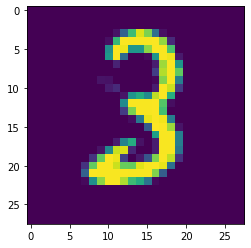

(28, 28, 1)


ValueError: in user code:


    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)


In [38]:
plt.imshow(test_data[4, :, :, 0])
plt.show()
print(test_data[4].shape)
print(model.predict(test_data[4]))